<a href="https://colab.research.google.com/github/GiammarcoBozzelli/green-patents/blob/main/final_notebook_elephant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final notebook - Elephant Group
Team members: Giammarco Bozzelli, Igor Dallemagne, Aleksandr Dubinin

In [ ]:
%%capture
!git clone https://github.com/GiammarcoBozzelli/green-patents.git
%cd green-patents
!pip install -r requirements.txt

In [ ]:
from Modules import *
import numpy as np
import pandas as pd

In [ ]:
merged_final = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/green-patents/main/data/final.csv')

# In the Face of Adversity: Weather Shocks' Influence on Green Innovation



<img src='https://www.versuslehti.fi/wp-content/uploads/knowyourmeme1.jpg' width="400">

As the world grapples with the intensifying effects of climate change, extreme weather events are becoming increasingly frequent and severe. Green innovation, the development of environmentally friendly technologies and practices, holds immense potential to mitigate the impacts of climate change and foster sustainable economic growth. Understanding the complex interplay between extreme weather events and green innovation in the current economic landscape is crucial for navigating the challenges and opportunities presented by the evolving climate crisis.

In this article we aim to deepen our understanding of this relationship following previous work done by Jun Wen, Xin-Xin Zhao, Qiang Fu, Chun-Ping Chang ('The Impact of Extreme Weather Events on Green Innovation: Which Ones Bring the Most Harm?'). In this paper, the authors address the negative influence of extreme events on green innovation over a 5 years time scale. They also suggest that countries with lower trade openness and higher corruption tend to react more adversely to extreme events. In this extension, our goal is to initially verify the overall impact of extreme events and then to further investigate the impact across different countries spaming on a longer time scale. Hence, we aim to answer the following two questions:


***H1: What is the impact of extreme weather events on green innovation?***

***H2: Is the impact consistent different countries?***


Ultimately, a collective significantly negative effect of extreme weather events on green innovation has been found (H1).

Further we assessed if the results would hold in countries-specific contexts. The way we tested this was by using two Difference-in-Difference (DID) models, one for two developed countries (Germany and Belgium) and the other with two developing countries (Thailand and Malaysia). We based our shift on the [World Data info](https://www.worlddata.info/developing-countries.php#google_vignette) definition that stipulates developing countries as having standard of living, income, economic and industrial development above or below the world average. With surprise, we see opposite results, with extreme events having a positive effect on green innovation for developed countries and a negative effect in countries under development (H2).


# Methodology

To answer our questions we used countries panel data of 101 countries spanning from 1977 to 2021, from the [OECD environmental statistics dataset](https://stats.oecd.org/index.aspx?queryid=29068) regarding the number of green patents applications, combined with data of extreme weather events obtained from the [EM-DAT database](https://www.emdat.be/), one of the most well recognized disaster data resource in the world. We decided to study a selected sample of catastrophe ('drought', 'flood', 'extreme temperature', 'storm', 'wildfire', 'glacial lake outburst flood') that we judge to be human and climate change related.

In order to improve the results of our analysis we introduced control variables obtained from the [World Bank](https://data.worldbank.org/) public databank, more specifically we used: $\text{Gross Domestic Product (GDP)}$  per capita to assess countries’ economic development, $\text{Foreign Direct Investment (FDI)}$ net inflows to control for foreign impacts on innovation through financing and knowledge spillovers, $\text{Consumption}$ at household level as a proxy for a country’s population willingness to adopt new technologies, $\text{Population}$ to take into account the sheer size of the country, and lastly the $\text{Tertiary}$ education enrollment rate to control also for the educational level, since higher education could lead to better research and innovative technologies.  

**Warning:** The dataset exhibits limitations due to sparse data availability across countries, with developed nations often having more comprehensive data, which may skew the generalizability of the findings. Moreover, the regression model may lack crucial variables like corruption levels, media freedom, industry structure, and others, all of which could significantly influence the response to extreme weather events in terms of innovation. To mitigate these limitations, in our DID model, we have specifically focused on similar countries to minimize the risk of omitting pertinent variables and enhance the reliability of our analysis.

Now, let's dive into our analysis!



## H1: What is the impact of extreme weather events on green innovation?

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


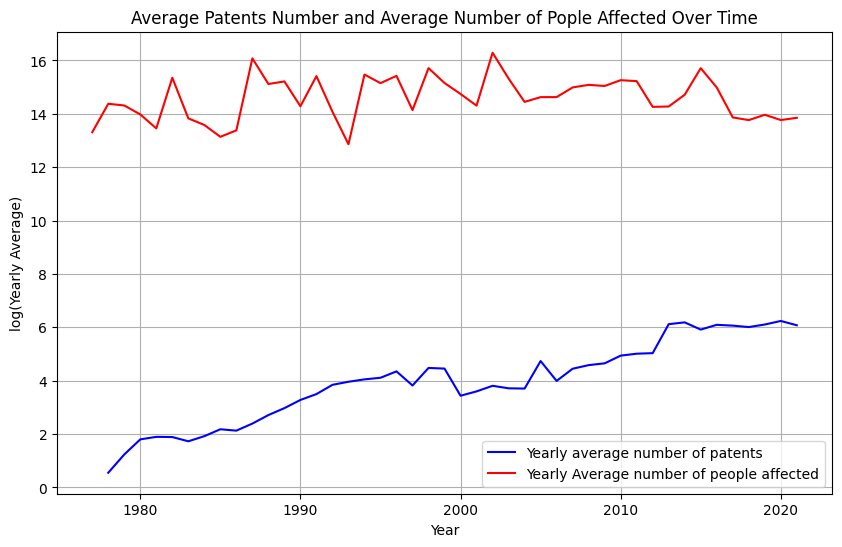

In [ ]:
plot_1(merged_final) #code in annex under Graph.1

Following is the formula for the regression used to investigate the relation between green innovation proxied by patents applications and extreme weather events:

$\text{Patents}_{it} = \beta_0 + \beta_1 \cdot \text{Total Affected}_{it} + \alpha_i + \gamma_t + \epsilon_{it}$


* $\text{Patents}_{it}$ = the number of environmental-related technology patents applications for 'Country i' in 'Year t', this variable proxies for the level of green innovation in a country
*   $\text{Total Affected}_{it}$ =  the number of people affected by extreme weather events for 'Country i' in 'Year t, proxy for the intensity of the disaster
* $α_{it}$ = Counutry level fixed effects,  accounting for unobserved heterogeneity across countries that doesn't change over time
* $γ_{it}$ = Time level fixed effects, capturing factors that affect countries uniformly during a specific year period.
* $ϵ_{it}$ = error terms, representing unobserved factors or random disturbances.


First we try to run the model only between the number of patents applications and the number of total people affected and we get an estimated coefficient for $\text{Total Affected}$ of $+1.318 \times 10^{-6}$, significant only at the $6\%$ level. (See appendix for the complete ***Table.1***)

In [ ]:
%%html
<div class="tenor-gif-embed" data-postid="17361118" data-share-method="host" data-aspect-ratio="0.940625" data-width="30%"><a href="https://tenor.com/view/hold-on-wait-a-minute-somethings-aint-right-hold-up-somethings-wrong-here-gif-17361118">Hold On Wait A Minute GIF</a>from <a href="https://tenor.com/search/hold+on-gifs">Hold On GIFs</a></div> <script type="text/javascript" async src="https://tenor.com/embed.js"></script>

This would contradict the agreement present in the literature related to the negative effects of extreme weather events and green innovation.

Next, we progressively add control variables until reaching this final model:

$\text{Patents}_{it} = \beta_0 + \beta_1 \cdot \text{Total Affected}_{it} + \beta_2 \cdot \text{GDP}_{it} + \beta_3 \cdot \text{FDI}_{it} + \beta_4 \cdot \text{Consumption}_{it} + \beta_5 \cdot \text{Population}_{it} + \beta_6 \cdot \text{Tertiary}_{it} + \alpha_i + \gamma_t + \epsilon_{it}$




* $\text{GDP}_{it}$: Gross Domestic Product. Economic conditions may influence the number of green patents applications. A growing economy has been shown to have  more resources for innovation.

* $\text{FDI}_{it}$: Foreign Direct Investment. Countries with more FDI might have more international collaboration and knowledge transfer.

* $\text{Consumption}_{it}$: Represents the consumption level. Included to capture the overall economic activity in the country, higher consumpions maight indicate and higher williness to use new technologies.

* $\text{Population}_{it}$: The population of the region or country. Larger populations may drive higher demand for sustainable technologies, contributing to more green patents or simply increasing the number of applications.

* $\text{Tertiary}_{it}$: The proportion of the population involved in tertiary education (e.g., universities, research institutions). This variable is used to capture the level of education and research activity, influencing innovation.


Running the model provides a final coefficient for ${Total Affected}$ equal to $-2,643  \times 10^{-6}$ statistically significant below the $1\%$ level (see annex for the full table ***Table.2***). This suggests that the occurrence of extreme weather events causes a decrease in the number of environmental related patents applications, meaning a reduction in the level of green innovation in the effected countries. The results are congruent with those found in the literature and are statistically significant. More precisely we see that all variables, except for $\text{Tertiary}$ contribute in improving the statistically significance of the results and are significant far below the $\text{1%}$ level.

A possible explanation for the negative coefficient is that following such extreme events, governments tend to shift their effort and resources towards disaster response and recovery effects, reallocating research and development funds away from green innovation initiatives. Furthermore, physical damages to buildings may also affect research facilities and crucial infrastructure needed for technological advancements diverting financial resources towards reconstructions rather than green projects. Looking at a broader picture, countries affected by extreme shocks may result in less attractive markets for investors, decreasing the fundings for longer terms projects, that are typical when doing research and development for new technologies.  

Another explanation could be given by looking at the human aspects of such events. People affected may have to stop going to work for transport  limitations or infrastructural damanges.  People also could be facing some economics limitations driven by the need to cope with the damages of extreme events, limiting their resources to be invested on more essential needs rather then on new technologies.




## H2: Is the impact consistent across countries?

In this section, we delve deeper into understanding the causal relationship between weather shocks and the application of green patents, employing the difference-in-differences (DID) method for cross-country comparisons. In essence, the DID framework in econometrics assesses changes in an outcome between two groups over time to estimate the treatment's causal impact, which is in our case the occurence of a weather shock. One group encounters the weather shock (treated group), while the other remains unaffected (control group). The model calculates the difference in changes between the control and treatment groups, assuming any pre-threshold differences in trends arise from factors apart from the shock itself, and any post-threshold differences are due to the shock.

To better grasp the model, let's start by elucidating the theoretical rationale behind it. Essentially, we construct a dataset using two sets of dummy variables: the first set distinguishes between before $(\text{t}_{0})$ and after $(\text{t}_{1})$ the treatment, and the second set categorizes the treated $(\text{D}_{1})$ and control $(\text{D}_{0})$ groups. As depicted in the table below, each cell represents $\text{Y}_{it}$.




|                   | Before the Treatment | After the Treatment |
|-------------------|:---------------------:|:--------------------:|
| **Treated Group** | $\text{Y}_{i0}$  𝗜 $\text{D}_{1}$          | $\text{Y}_{i1}$  𝗜 $\text{D}_{1}$        |
| **Control Group** | $\text{Y}_{i0}$  𝗜 $\text{D}_{0}$         | $\text{Y}_{i1}$  𝗜 $\text{D}_{0}$            |

To better understand the table you can refere to the graphe below, where :  
* $a$ represent $\text{Y}_{i0}$  𝗜 $\text{D}_{0}$
* $b$ represent $\text{Y}_{i1}$  𝗜 $\text{D}_{0}$
* $c$ represent $\text{Y}_{i0}$  𝗜 $\text{D}_{1}$
* $d$ represent $\text{Y}_{i1}$  𝗜 $\text{D}_{1}$
* $d'$ represent the hypothetical reaction that would have the tested group without treatment


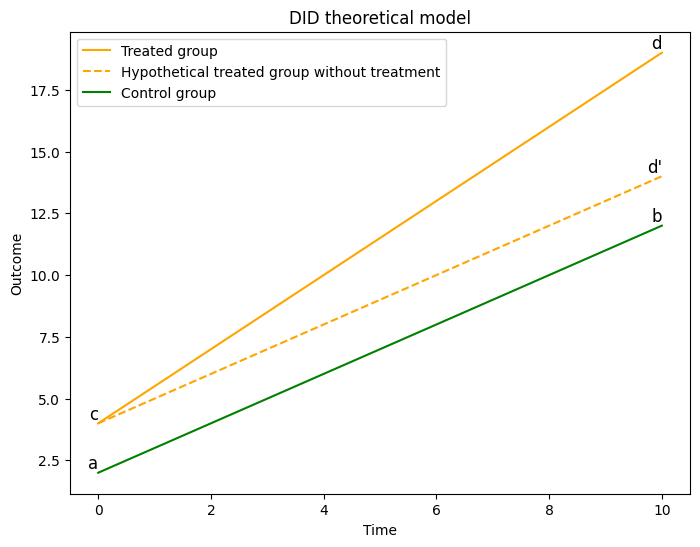

In [ ]:
graphe() # plot the dif-in-dif theory graph Graph.2

In the graph, the orange line  represents the tested group, while the green line represents the control group. Hence, 'a' and 'c' denote the situation before the treatment, and 'b' and 'd' denote the situation after the treatment. The essence of the DID model lies in assessing the changes attributed to the treatment. It operates under the assumption that, in the absence of treatment, the tested group would follow the trend of the control group, illustrated by the orange dotted line. The treatment's impact is evaluated by measuring the difference between 'd ' and 'd' ', represented by the Greek letter $Δ$. Thus, $Δ = d - d' = (d - c) - (b - a)$.


Mathematically, the formula is represented as $\text{Y}_{it}$ = $\text{β}_{1}$ + $\text{β}_{2}$ $\text{t}$ + $\text{β}_{3}$ $\text{D}_{i}$ + $\text{β}_{4}$ $\text{D}_{i}$ $\text{t}$ + $\text{ϵ}_{i}$

Where :
* $\text{β}_{1}$ is the initial constant  
* $\text{β}_{2}$ is the effect of the time on both groups
* $\text{β}_{3}$is the difference before treatment between both groups
* $\text{β}_{4}$ is the measured effect of the treatment, which represents Δ

###Germany and Belgium

Now that the model is set, let's delve into the rationale behind its use in our study. We employ the DID model to evaluate whether we can reliably infer that extreme weather events indeed impact the application of green patents. Our aim was to select two countries that are not only geographically and culturewise close, minimizing the influence of omitted variables, but also feature one with a significant event and the other without.

Thus, our initial considerations focused on Germany and Belgium for control purposes. They are neighboring countries, exhibiting similar GDP per Capita (Germany in 2022 `$48,432`, Belgium in 2022 `$49,582`), climate concern (Germany in 2022 `75%`, Belgium in 2022 `69%` from [Meta Study](https://dataforgood.facebook.com/dfg/tools/climate-change-opinion-survey)) and a high level of tertiary education (Germany in 2021 `77%`, Belgium in 2021 `82%`). We presume these factors to remain consistent over the years. Additionally, to address differences in the countries' demographic sizes, we will evaluate the number of patents per capita. We also applied a ratio between the total affected per year and the total number of catastrophes for the same year to scale the differences between events. Indeed, we assume that a major flood affecting a significant number of people has a greater impact than several floods with less affected people. Hence, the ratio single out years with a significant number of severe events in terms of total affected, rather than emphasizing years with a high number of events.



Considering the graph below, we note that in 1993, 1999 and 2002 Germany witnessed peaks in the ratio, unlike Belgium. We opted to select the highest peak in 2002 to assess whether catastrophes influence people's engagement in Research & Development for patents, allowing us to gauge the impact over a ninetheen-year period. Hence, we will set the threshold year for the DID model as 2002, with Germany as the treated group and Belgium as the control group.

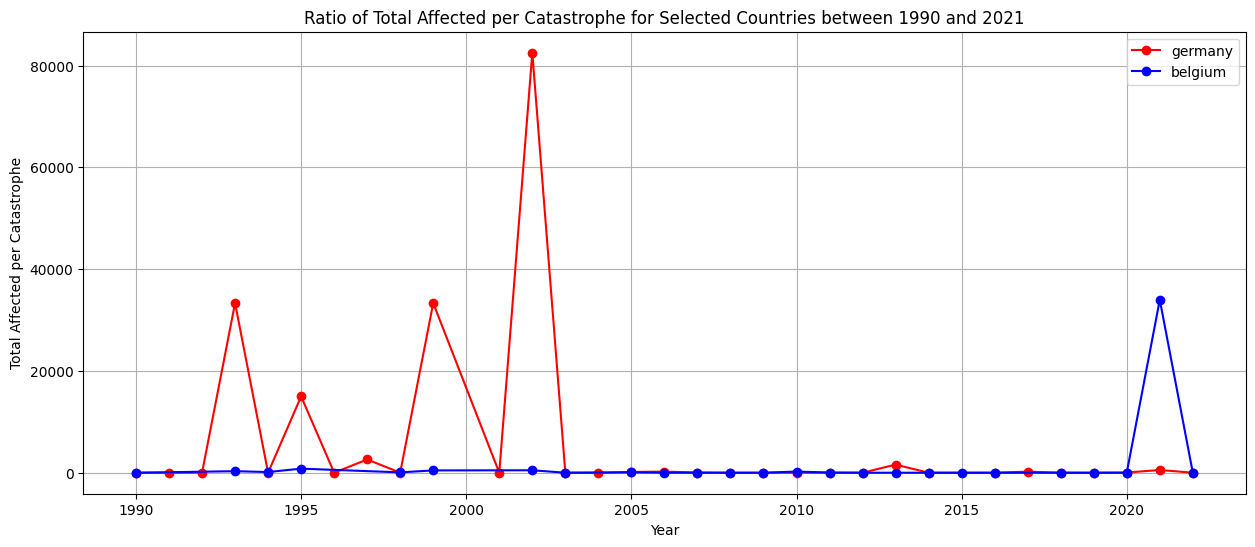

In [ ]:
ratioger_bel()  #code in annex Graph.3

For this model, we employed a DID approach using the following formula:

$\text{PatentperCapita}_{it}$ = $\text{β}_{1}$ + $\text{β}_{2}$ $\text{AfterChock}$ + $\text{β}_{3}$ $\text{isGermany}_{i}$ + $\text{β}_{4}$ $\text{AfterChockGermany}_{i}$ + $\text{ϵ}_{i}$


Where:

* $\text{AfterChock}$ represents the dummy variable for before/after the threshold.
* $\text{isGermany}_{i}$ is the dummy variable distinguishing between both groups.
* $\text{AfterChockGermany}_{i}$ signifies the interaction between the first two dummy variables.


You can find below the graph of the DID model between Germany and Belgium.

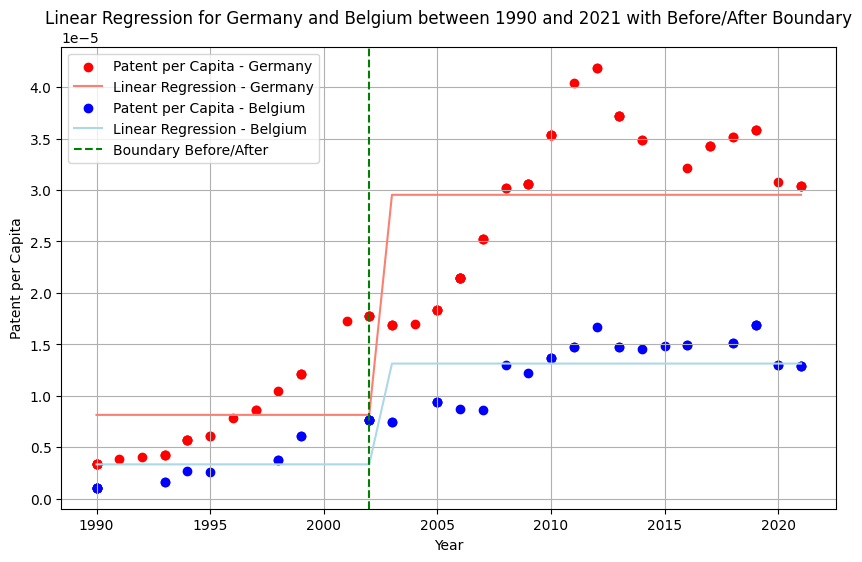

In [ ]:
difdifger_bel()  #code in annex Graph.4

Regarding the graph, we note that both cases experienced a positive impact on patents per capita due to the threshold events. However, a more significant shift is observed in the treated group, indicating a greater impact on Germany. Let's examine the regression table results to better understand this impact. The table indicates that $\text{β}_{4}$ equals 1.159x10<sup>-5</sup> (p-value = 0.000), confirming that the 2002 shock had a long term positive impact on the application of green patents per capita by this amount in Germany. Simultaneously, $\text{β}_{2}$ equals 9.8x10<sup>-6</sup> (p-value = 0.000) (see appendix for the full table ***Table.3***), supporting our assertion that the event positively impacted both countries but had a greater effect on Germany.


Upon revisiting the graph, we observe that following the shock, Germany faced a stagnation in patents per capita for the subsequent three years, suggesting that the treated country needed time to recover from the impact before experiencing growth in applications. However, we also notice that the growth curve started in 1995, potentially influenced by the earlier peaks observed in the ratio graph. Concerning the control group, a more consistent growth pattern is evident, affirming that even without events, there is a structural trend towards an increase in patents per capita.

In [27]:
%%html
<div class="tenor-gif-embed" data-postid="24004933" data-share-method="host" data-aspect-ratio="1.39738" data-width="35%"><a href="https://tenor.com/view/confused-face-gif-24004933">Confused Face GIF</a>from <a href="https://tenor.com/search/confused-gifs">Confused GIFs</a></div> <script type="text/javascript" async src="https://tenor.com/embed.js"></script>


Ok... we weren't expecting that.

Now, let's see if the same applies for less developed countries.

###Thailand and Malaysia

Our attention is directed towards Thailand and Malaysia for this purpose. Once again, we aim to assess countries that are similar to minimize the risk of omitted variables. However, as already discussed in the methodology, data availability in developing countries is often sparse. This poses a challenge in identifying two countries with similar primary aspects, adequate patent information, and distinct climate patterns. Therefore, we assume both countries to be relatively similar due to their geographical proximity and shared cultural traits. We acknowledge the differences, such as GDP per capita (Thailand in 2022 `$6,908`, Malaysia in 2022 `$11,971`), climate concern (Thailand in 2022 `67%`, Malaysia in 2022 `79%` from [Meta Study](https://dataforgood.facebook.com/dfg/tools/climate-change-opinion-survey)), and tertiary education (Thailand in 2022 `49%`, Malaysia in 2022 `40%`).

Observing the graph below, we notice peaks in Thailand for the years 2010 and 2012, unlike Malaysia. We will set the threshold at the highest peak in 2010, considering Thailand as the treated group and Malaysia as the control group. Building upon the structural trend of increased green patents, we could expect that setting a threshold later in subsequent years might as well influence the outcome compared to the initial DID model between Germany and Belgium, maintaining a ten-year timeframe.

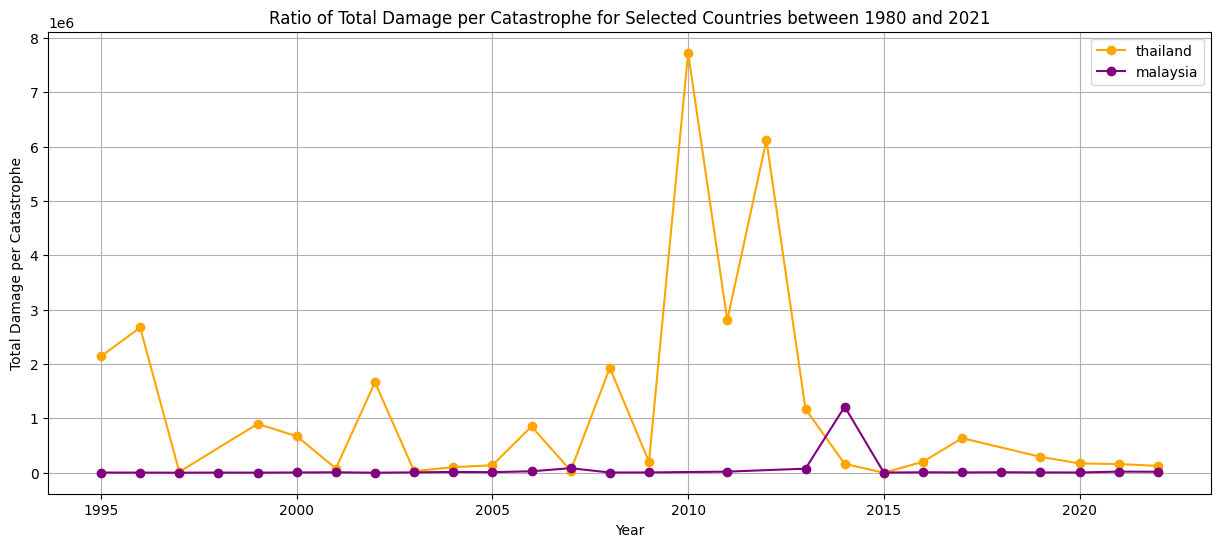

In [ ]:
ratiotha_mal()  #code in annex Graph.5

For the second DID model, we employed a similar formula as in the first one:


$\text{PatentperCapita}_{it}$ = $\text{β}_{1}$ + $\text{β}_{2}$ $\text{AfterChock}$ + $\text{β}_{3}$ $\text{isThailand}_{i}$ + $\text{β}_{4}$ $\text{AfterChockThailand}_{i}$ + $\text{ϵ}_{i}$

Where:

* $\text{AfterChock}$ represents the dummy variable for before/after the threshold.
* $\text{isThailand}_{i}$ is the dummy variable distinguishing between both groups.
* $\text{AfterChockThailand}_{i}$ signifies the interaction between the first two dummy variables.

You can find below the graphe of the DID model between Thailand and Malaysia.

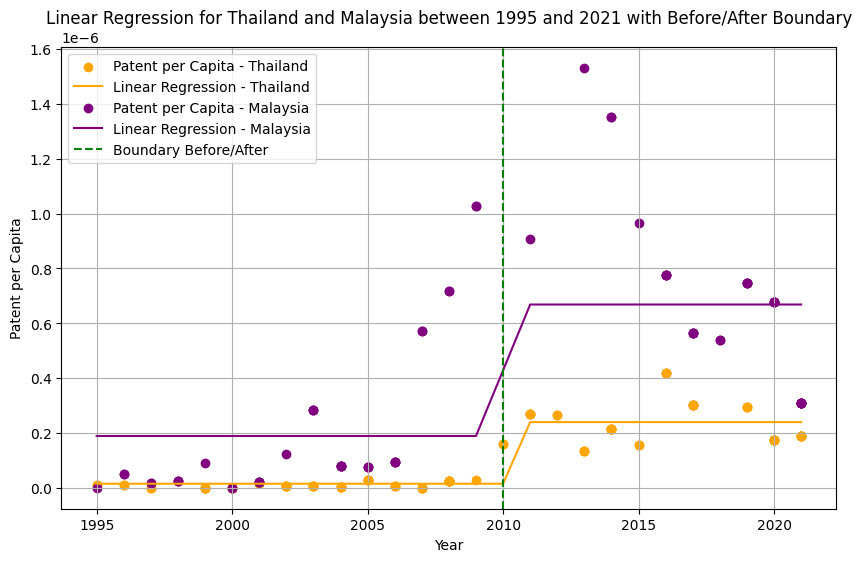

In [ ]:
 difdiftha_mal()  #code in annex Graph.6

Regarding the analysis, we started in 1995, marking the earliest available patent data for both countries. Upon reviewing the graph, we notice an increase for both countries after the threshold, with this increase being more pronounced for the control group this time. The results table confirms these observations, with $\text{β}_{4}$ amounting to -2.549x10<sup>-7</sup> (p-value = 0.000) (see appendix for the full table ***Table.4***). This implies that the event had negativily impacted the treated group in terms of patent per capita compared to the control group. This result corresponds with our observations in the subsequent linear model and is consistent with the literature.

Additionally, we observed a sudden surge in patent per capita in Malaysia on the graph before the threshold, followed by a return to normalcy around 2020. As the events remained consistent during this period, it suggests the potential influence of other factors causing such abrupt changes, opening further research for comprehension.

# Conclusions

As a result, our study extends Jun Wen, Xin-Xin Zhao, Qiang Fu, and Chun-Ping Chang's paper by exploring various aspects. Initially, we constructed a regression model to ascertain if we arrived at a similar conclusion, determining that weather events indeed negatively impact the application of green patents. Subsequently, we sought to delve deeper into the underlying mechanisms by investigating two primary facets: the disparities between developed and developing countries and the long-term impact of a major event.

Utilizing the DID model enabled us to explore these aspects. We conducted parallel tests: one involving developed countries (proxied by Germany and Belgium) and another focusing on developing countries (proxied by Thailand and Malaysia). In both cases, a single country was affected by extreme events within minimum a ten-year time frame before and after the threshold event. Our findings revealed distinct reactions to events in developed and developing countries. Developed countries showcased a positive response in the long run to weather shocks toward green patent application, whereas developing countries demonstrated a negative reaction. These outcomes may elucidate why the overall impact of extreme events appears negative, particularly as developing countries constitute 84% of the world population and are the one mostly affected by extreme weather events (source : [World Data info](https://www.worlddata.info/developing-countries.php#google_vignette)). Furthermore, we could attempt to defend these outcomes by considering the diverse economic priorities in these countries, concernig investment in education and green funds. The tertiary education that is higher in developped countries likely amplifies sensitivity towards linking climate change with natural disasters.Higher industrial development in these countries provides easier access to cutting-edge solutions and advanced technology.

Looking ahead to future research prospects, we would broaden our analysis by incorporating a more extensive sample encompassing both developed and developing countries. Additionally, given the anticipated rise in total patent numbers coupled with increased climate awareness, we anticipate varying reactions to extreme events in the coming years.

# Appendix

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from IPython.display import display
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from stargazer.stargazer import Stargazer
import pycountry
from IPython.display import Image, display,HTML

### Graph.1

In [ ]:
def plot_1(df):
  avg_patents_by_year = df.groupby('Year')['patents_number'].mean().reset_index().dropna()
  avg_damage_by_year = df.groupby('Year')['total_affected'].mean().reset_index().dropna()
  plt.figure(figsize=(10, 6))
  plt.plot(avg_patents_by_year['Year'], np.log(avg_patents_by_year['patents_number']), linestyle='-', color='b', label='Yearly average number of patents')
  plt.plot(avg_damage_by_year['Year'], np.log(avg_damage_by_year['total_affected']), linestyle='-', color='r', label='Yearly Average number of people affected')

  plt.title('Average Patents Number and Average Number of Pople Affected Over Time')
  plt.xlabel('Year')
  plt.ylabel('log(Yearly Average)')
  plt.legend()
  plt.grid(True)
  plt.show()

### Table.1

In [ ]:
# raw regression without fixed effects nor controls
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          146.92     14.999     9.7951     0.0000      117.50      176.34
total_affected  1.318e-06  7.037e-07     1.8726     0.0613  -6.231e-08   2.698e-06


### Table.2

In [ ]:
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + FDI + consumption + Population + Tertiary + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -1112.0     180.46    -6.1620     0.0000     -1465.9     -758.05
total_affected -2.643e-06  6.204e-07    -4.2608     0.0000   -3.86e-06  -1.427e-06
GDP                0.0174     0.0018     9.9367     0.0000      0.0140      0.0208
FDI             4.836e-09  3.029e-10     15.968     0.0000   4.242e-09    5.43e-09
consumption        11.300     2.1114     5.3521     0.0000      7.1594      15.441
Population      1.752e-06  2.974e-07     5.8913     0.0000   1.169e-06   2.336e-06
Tertiary          -1.0698     1.0320    -1.0366     0.3001     -3.0939      0.9543


### Graph.2

In [ ]:

def graphe(): # plot graph to illustrate the Dif-in-dif theoretical model
    x1 = np.linspace(0, 10, 100)
    y1 = 1.5 * x1 + 4

    x2 = np.linspace(0, 10, 100)
    y2 = x2 + 4

    x3 = np.linspace(0, 10, 100)
    y3 = x3 + 2

    plt.figure(figsize=(8, 6))
    plt.plot(x1, y1, color='orange', label='Treated group')
    plt.plot(x2, y2, linestyle='--', color='orange', label='Hypothetical treated group without treatment')
    plt.plot(x3, y3, color='green', label='Control group')

    plt.text(x1[0], y1[0], 'c', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x1[-1], y1[-1], 'd', fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x2[0], y2[0], '', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x2[-1], y2[-1], "d'", fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x3[0], y3[0], 'a', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x3[-1], y3[-1], 'b', fontsize=12, color='black', ha='right', va='bottom')

    plt.title('DID theoretical model')
    plt.xlabel('Time')
    plt.ylabel('Outcome')
    plt.legend()
    plt.show()


### Graph.3

In [ ]:
def ratioger_bel():

    df = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/green-patents/main/data/cata.csv')

    sample = ['germany', 'belgium']

    plt.figure(figsize=(15, 6))
    for pays in sample:
        data_selected = df[(df['Country'] == pays) & (df['Year'].between(1990, 2022))]
        catastrophes_per_year = data_selected['Year'].value_counts().sort_index()
        damage_per_year = data_selected.groupby('Year')["Total Affected"].sum().fillna(0)

        ratio = damage_per_year / catastrophes_per_year

        if pays == 'germany':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='red')
        elif pays == 'belgium':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='blue')

    plt.xlabel('Year')
    plt.ylabel('Total Affected per Catastrophe')
    plt.title('Ratio of Total Affected per Catastrophe for Selected Countries between 1990 and 2021')
    plt.legend()
    plt.grid(True)
    plt.show()

### Graph.4

In [ ]:
def difdifger_bel():
  plt.figure(figsize=(10, 6))

  ger_bel = pd.read_csv('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/ger_bel.csv')

  germany_data = ger_bel[ger_bel['is Germany'] == 1]

  model_germany = sm.OLS(germany_data['Patent per Capita'],
                        sm.add_constant(germany_data[['after chock', 'After Chock Gemrany']]))

  results_germany = model_germany.fit()

  predictions_germany = results_germany.predict()


  belgium_data = ger_bel[ger_bel['is Germany'] == 0]

  model_belgium = sm.OLS(belgium_data['Patent per Capita'],
                          sm.add_constant(belgium_data[['after chock', 'After Chock Gemrany']]))

  results_belgium = model_belgium.fit()

  predictions_belgium = results_belgium.predict()


#Sort data from 1990 to 2021

  germany_data_filtered = germany_data[(germany_data['Year'] >= 1990) & (germany_data['Year'] <= 2021)]
  predictions_germany_filtered = predictions_germany[(germany_data['Year'] >= 1990) & (germany_data['Year'] <= 2021)]

  belgium_data_filtered = belgium_data[(belgium_data['Year'] >= 1990) & (belgium_data['Year'] <= 2021)]
  predictions_belgium_filtered = predictions_belgium[(belgium_data['Year'] >= 1990) & (belgium_data['Year'] <= 2021)]

#regression for germany
  plt.scatter(germany_data_filtered['Year'], germany_data_filtered['Patent per Capita'], label='Patent per Capita - Germany', color='red')
  plt.plot(germany_data_filtered['Year'], predictions_germany_filtered, label='Linear Regression - Germany', color='salmon')

#regression for austria
  plt.scatter(belgium_data_filtered['Year'], belgium_data_filtered['Patent per Capita'], label='Patent per Capita - Belgium', color='blue')
  plt.plot(belgium_data_filtered['Year'], predictions_belgium_filtered, label='Linear Regression - Belgium', color='lightblue')

#shift line
  plt.axvline(x=2002, color='green', linestyle='--', label='Boundary Before/After')

  plt.xlabel('Year')
  plt.ylabel('Patent per Capita')
  plt.title('Linear Regression for Germany and Belgium between 1990 and 2021 with Before/After Boundary')
  plt.legend()
  plt.grid(True)
  plt.show()

### Table.3

In [ ]:
#computation with patent per capita
ger_bel = pd.read_csv('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/ger_bel.csv')
ger_bel['After Chock Gemrany'] = ger_bel['is Germany'] * ger_bel['after chock']

model = sm.OLS(ger_bel['Patent per Capita'],
               sm.add_constant(ger_bel[['is Germany', 'after chock', 'After Chock Gemrany']]))

results = model.fit(cov_type='HC1')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Patent per Capita   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     159.7
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           6.46e-43
Time:                        14:29:24   Log-Likelihood:                 1402.3
No. Observations:                 131   AIC:                            -2797.
Df Residuals:                     127   BIC:                            -2785.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.324e-06   6

### Graph.5

In [ ]:
def ratiotha_mal():
  cata = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/green-patents/main/data/cata.csv')

  sample = ['thailand', 'malaysia']

  plt.figure(figsize=(15, 6))
  for pays in sample:
    data_selected = cata[(cata['Country'] == pays) & (cata['Year'].between(1995, 2022))]
    catastrophes_per_year = data_selected['Year'].value_counts().sort_index()
    damage_per_year = data_selected.groupby('Year')["Total Affected"].sum().fillna(0)

    ratio = damage_per_year / catastrophes_per_year

    if pays == 'malaysia':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='purple')
    elif pays == 'thailand':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='orange')

  #plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays)

  plt.xlabel('Year')
  plt.ylabel('Total Damage per Catastrophe')
  plt.title('Ratio of Total Damage per Catastrophe for Selected Countries between 1980 and 2021')
  plt.legend()
  plt.grid(True)
  plt.show()

### Graph.6

In [ ]:
def difdiftha_mal():

  tha_mal = pd.read_csv('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/tha_mal.csv')

  tha_mal['After Chock Thailand'] = tha_mal['is Thailand'] * tha_mal['After Chock']

  thailand_data = tha_mal[tha_mal['is Thailand'] == 1]

  model_thailand = sm.OLS(thailand_data['Patent per Capita'],
                          sm.add_constant(thailand_data[['After Chock', 'After Chock Thailand']]))

  results_thailand = model_thailand.fit()

  predictions_thailand = results_thailand.predict()

  malaysia_data = tha_mal[tha_mal['is Thailand'] == 0]

  model_malaysia = sm.OLS(malaysia_data['Patent per Capita'],
                          sm.add_constant(malaysia_data[['After Chock', 'After Chock Thailand']]))

  results_malaysia = model_malaysia.fit()

  predictions_malaysia = results_malaysia.predict()

  plt.figure(figsize=(10, 6))

#Sort data from 1990 to 2021
  thailand_data_filtered = thailand_data[(thailand_data['Year'] >= 1995) & (thailand_data['Year'] <= 2021)]
  predictions_thailand_filtered = predictions_thailand[(thailand_data['Year'] >= 1995) & (thailand_data['Year'] <= 2021)]

  malaysia_data_filtered = malaysia_data[(malaysia_data['Year'] >= 1995) & (malaysia_data['Year'] <= 2021)]
  predictions_malaysia_filtered = predictions_malaysia[(malaysia_data['Year'] >= 1995) & (malaysia_data['Year'] <= 2021)]

#regression for Brazil
  plt.scatter(thailand_data_filtered['Year'], thailand_data_filtered['Patent per Capita'], label='Patent per Capita - Thailand', color='orange')
  plt.plot(thailand_data_filtered['Year'], predictions_thailand_filtered, label='Linear Regression - Thailand', color='orange')

#regression for germany
  plt.scatter(malaysia_data_filtered['Year'], malaysia_data_filtered['Patent per Capita'], label='Patent per Capita - Malaysia', color='purple')
  plt.plot(malaysia_data_filtered['Year'], predictions_malaysia_filtered, label='Linear Regression - Malaysia', color='purple')

#shift line
  plt.axvline(x=2010, color='green', linestyle='--', label='Boundary Before/After')

  plt.xlabel('Year')
  plt.ylabel('Patent per Capita')
  plt.title('Linear Regression for Thailand and Malaysia between 1995 and 2021 with Before/After Boundary')
  plt.legend()
  plt.grid(True)
  plt.show()

### Table.4

In [ ]:
tha_mal = pd.read_csv('https://github.com/GiammarcoBozzelli/green-patents/raw/main/data/tha_mal.csv')

tha_mal['After Chock Thailand'] = tha_mal['is Thailand'] * tha_mal['After Chock']

model = sm.OLS(tha_mal['Patent per Capita'],
               sm.add_constant(tha_mal[['is Thailand', 'After Chock', 'After Chock Thailand']]))

results = model.fit(cov_type='HC1')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Patent per Capita   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     159.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           2.70e-49
Time:                        14:29:33   Log-Likelihood:                 2462.3
No. Observations:                 175   AIC:                            -4917.
Df Residuals:                     171   BIC:                            -4904.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.887e-07 